# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

### Открытие файла с данными и изучение общей информации

Выводим на экран первые пять строк датафрейма:

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем на экран общую информацию о датафрейме:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую диаграмму для всех столбцов таблицы:

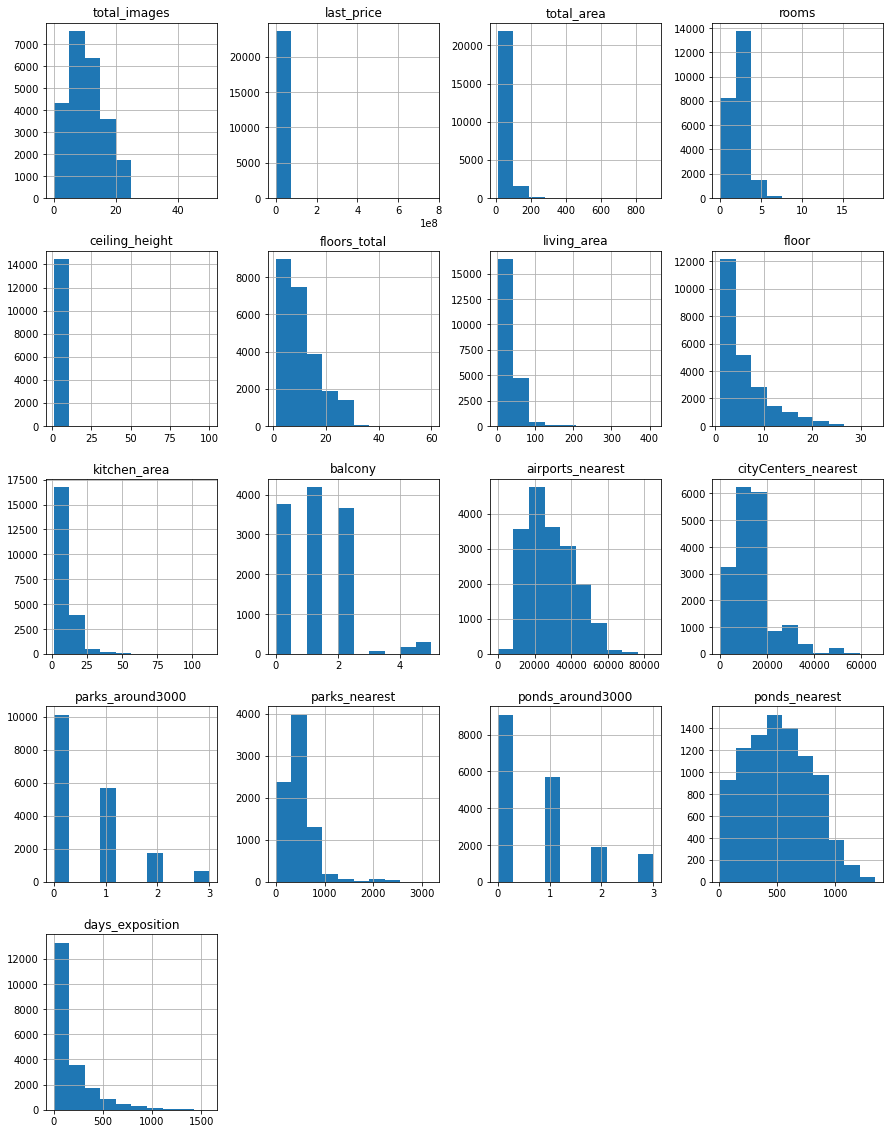

In [5]:
df.hist(figsize = (15, 20));

### Предобработка данных

Ещё раз посмотрим на общую информацию о таблице, чтобы определить столбцы с пропусками:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из данных видим пропуски в следующих столбцах:
- ceiling_height - содержит высоту потолков в метрах, пропуски в этом столбце заменить невозможно;
- floors_total - содержит информацию об общем количестве этажей в доме, пропуски в этом столбце заменить невозможно;
- living_area - содержит информацию о жилой площади в квадратных метрах, пропуски в этом столбце заменим через расчёт коэффициента отношения жилой площади к общей в разрезе квартир с разным количеством комнат;
- is_apartment - содержит информацию о том, является ли квартира апартаментами. Вероятнее всего, владельцы апартаментов указывают данную информацию в объявлениях о продаже квартиры, поэтому пропуски можно заменить значениями False;
- kitchen_area - содержит информацию о площади кухни в квадратных метрах, пропуски в этом столбце заменим через расчёт коэффициента отношения жилой площади к общей в разрезе квартир с разным количеством комнат;
- balcony - содержит информацию о количестве балконов. Вероятнее всего, если в объявлении количество балконов не указано - их нет, поэтому пропуски можно заменить нулями;
- locality_name - содержит информацию о названии населённого пункта. Пропуски можно заменить на Unknown;
- airports_nearest - содержит информацию о расстоянии до ближайшего аэропорта в метрах, пропуски в этом столбце заменить невозможно;
- cityCenters_nearest - содержит информацию о расстоянии до центра города в метрах, пропуски в этом столбце заменить невозможно;
- parks_around3000 - содержит информацию о количестве парков в радиусе 3 км, пропуски в этом столбце заменить невозможно;
- parks_neares - содержит информацию о расстоянии до ближайшего парка в метрах, пропуски в этом столбце заменить невозможно;
- ponds_around3000 - содержит информацию о количестве водоёмов в радиусе 3 км, пропуски в этом столбце заменить невозможно;
- ponds_neares - содержит информацию о расстоянии до ближайшего водоёма в метрах, пропуски в этом столбце заменить невозможно;
- days_exposition - содержит информацию о количестве дней размещения объявления. Пропуски заменить невозможно, т.к. в данном столбце отсутствие данных подразумевает под собой факт того, что объявление ещё размещено.

Для замены пропусков в столбце, содержащем информацию о жилой площади, расссчитаем коэффициент отношения жилой площади к общей в pd.Series([np.nan]).median()
разрезе квартир с разным количеством комнат и применим его к значениям общей площади в тех строках, где обнаружены пропуски столбца жилой:

In [7]:
gb = df.groupby('rooms')

df['living_area'] = df['living_area'].fillna(gb['living_area'].transform(lambda x : (x / gb.get_group(x.name)['total_area']).median()) * df['total_area'])

Для замены пропусков в столбце, содержащем информацию о площади кухни, расссчитаем коэффициент отношения площади кухни к общей в разрезе квартир с разным количеством комнат и применим его к значениям общей площади в тех строках, где обнаружены пропуски столбца жилой:

In [8]:
df['kitchen_area'] = df['kitchen_area'].fillna(gb['kitchen_area'].transform(lambda x : (x / gb.get_group(x.name)['total_area']).median()) * df['total_area'])

Заменим пропуски в столбцах is_apartment, balcony, locality_name и days_exposition:

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
df['locality_name'] = df['locality_name'].fillna('Unknown')

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Посмотрим на таблицу ещё раз, чтобы проверить изменения:

In [11]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,100.435000,9,False,False,False,20.442857,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,41.886654,22,False,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.430000,26,False,False,False,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Перепроверим путём вызова общей информации о таблице:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

В указанных столбцах пропусков не осталось.

Пропуски могли появиться по следующим причинам:
1. Ошибка при выгрузке данных;
2. Ошибка при преобразовании данных из одного типа в другой;
3. Отсутствие данных в объявлении;
4. Ошибки при записи данных в базу данных;
5. Ошибки при восстановлении данных, если происходили сбои при хранении.

Для данных в столбце first_day_exposition требуется изменение типа, а именно: сейчас тип object, необходимо привести к datetime для возможности произведения над данными арифметических операций.

Также для удобства проведения операций заменим вещественный тип чисел на целочисленные там, где дробная часть числа не используется в значениях:
- цена на момент публикации указана в рублях и является целым числом;
- количество балконов не может быть вещественным числом;
- количество дней размещения объявления также отражено в виде целочисленных значений.

In [13]:
df[['last_price', 'balcony']] = df[['last_price', 'balcony']].astype(int)

Заменим название столбца cityCenters_nearest, приведя его к snake case:

In [14]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Ещё раз посмотрим информацию о таблице, чтобы убедиться в изменениях:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

Проверим данные на наличие явных дубликатов:

In [16]:
df.duplicated().sum()

0

Явные дубликаты в таблице отсутствуют, поэтому проверим данные на наличие неявных дубликатов по столбцу locality_name. Для этого выведем список и количество уникальных значений в столбце:

In [17]:
display(sorted(df['locality_name'].unique()))
display(df['locality_name'].nunique())

['Unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

365

В столбце 365 уникальных значений, но среди них обнаружены неявные дубликаты, такие как:
- городской поселок Янино-1 и городской посёлок Янино-1;
- Мурино, поселок Мурино и посёлок Мурино;
- городской поселок Большая Ижора и поселок городского типа Большая Ижора;
- городской посёлок Назия и поселок городского типа Назия;
- городской посёлок Рощино и поселок городского типа Рощино;
- городской посёлок Советский и поселок городского типа Советский;
- поселок Аннино и посёлок Аннино;
- поселок Бугры и посёлок Бугры;
- поселок Возрождение и посёлок Возрождение;
- поселок Гаврилово и посёлок Гаврилово;
- поселок Жилгородок и посёлок Жилгородок;
- поселок Ильичёво и посёлок Ильичёво;
- поселок Кобралово и посёлок Кобралово;
- поселок Коробицыно и посёлок Коробицыно;
- поселок Лисий Нос и посёлок Лисий Нос;
- поселок Мельниково и посёлок Мельниково;
- поселок Мичуринское и посёлок Мичуринское;
- поселок Новый Свет и посёлок Новый Свет;
- поселок Пансионат Зелёный Бор и посёлок Пансионат Зелёный Бор;
- поселок Перово и посёлок Перово;
- поселок Петровское и посёлок Петровское;
- поселок Победа и посёлок Победа;
- поселок Поляны и посёлок Поляны;
- поселок Старая Малукса и посёлок Старая Малукса;
- поселок Стеклянный и посёлок Стеклянный;
- поселок Сумино и посёлок Сумино;
- поселок Тельмана и посёлок Тельмана;
- поселок Терволово и посёлок Терволово;
- поселок Усть-Луга и посёлок Усть-Луга;
- поселок городского типа Вырица и посёлок городского типа Вырица;
- поселок городского типа Красный Бор и посёлок городского типа Красный Бор;
- поселок городского типа Кузьмоловский и посёлок городского типа Кузьмоловский;
- поселок городского типа Лебяжье и посёлок городского типа Лебяжье;
- городской посёлок Мга и посёлок городского типа Мга;
- поселок городского типа Рощино и посёлок городского типа Рощино;
- поселок городского типа Рябово и посёлок городского типа Рябово;
- поселок городского типа Токсово и посёлок городского типа Токсово;
- поселок городского типа Форносово и посёлок городского типа Форносово;
- поселок городского типа имени Свердлова и посёлок городского типа имени Свердлова;
- поселок станции Вещево и посёлок при железнодорожной станции Вещево.

Устраним неявные дубликаты в столбце путём замены значений:

In [18]:
df = df.replace([('городской посёлок Янино-1', 'городской поселок Янино-1'),
                 ('поселок Мурино', 'Мурино'),
                 ('посёлок Мурино', 'Мурино'),
                 ('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора'),
                 ('городской посёлок Назия', 'поселок городского типа Назия'),
                 ('городской посёлок Рощино', 'поселок городского типа Рощино'),
                 ('городской посёлок Советский', 'поселок городского типа Советский'),
                 ('посёлок Аннино', 'поселок Аннино'),
                 ('посёлок Бугры', 'поселок Бугры'),
                 ('посёлок Возрождение', 'поселок Возрождение'),
                 ('посёлок Гаврилово', 'поселок Гаврилово'),
                 ('посёлок Жилгородок', 'поселок Жилгородок'),
                 ('посёлок Ильичёво', 'поселок Ильичёво'),
                 ('посёлок Кобралово', 'поселок Кобралово'),
                 ('посёлок Коробицыно', 'поселок Коробицыно'),
                 ('посёлок Лисий Нос', 'поселок Лисий Нос'),
                 ('посёлок Мельниково', 'поселок Мельниково'),
                 ('посёлок Мичуринское', 'поселок Мичуринское'),
                 ('посёлок Новый Свет', 'поселок Новый Свет'),
                 ('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор'),
                 ('посёлок Перово', 'поселок Перово'),
                 ('посёлок Петровское', 'поселок Петровское'),
                 ('посёлок Победа', 'поселок Победа'),
                 ('посёлок Поляны', 'поселок Поляны'),
                 ('посёлок Старая Малукса', 'поселок Старая Малукса'),
                 ('посёлок Стеклянный', 'поселок Стеклянный'),
                 ('посёлок Сумино', 'поселок Сумино'),
                 ('посёлок Тельмана', 'поселок Тельмана'),
                 ('посёлок Терволово', 'поселок Терволово'),
                 ('посёлок Усть-Луга', 'поселок Усть-Луга'),
                 ('посёлок городского типа Вырица', 'поселок городского типа Вырица'),
                 ('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор'),
                 ('посёлок городского типа Кузьмоловский', 'поселок городского типа Кузьмоловский'),
                 ('посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье'),
                 ('городской посёлок Мга', 'посёлок городского типа Мга'),
                 ('посёлок городского типа Рощино', 'поселок городского типа Рощино'),
                 ('посёлок городского типа Рябово', 'поселок городского типа Рябово'),
                 ('посёлок городского типа Токсово', 'поселок городского типа Токсово'),
                 ('посёлок городского типа Форносово', 'поселок городского типа Форносово'),
                 ('посёлок городского типа имени Свердлова', 'поселок городского типа имени Свердлова'),
                 ('посёлок при железнодорожной станции Вещево', 'поселок станции Вещево')])

Проверим количество уникальных значений в столбце после замены дубликатов:

In [19]:
df['locality_name'].nunique()

285

Замена помогла устранить 80 неявно повторяющихся значений в столбце.

Проверим столбцы с количественными переменными на предмет редких и выбивающихся значений:

Для столбца с количеством фотографий в объявлении выведем отсортированный список уникальных значений:

In [20]:
df['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

В этом столбце аномальные значения отсутствуют.

Для столбца с ценой на момент снятия публикации также рассмотрим отсортированный список уникальных значений и общую информацию о значениях в столбце:

In [21]:
df['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

In [22]:
df['last_price'].describe().astype(int)

count        23699
mean       6541548
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int32

In [23]:
df[df['last_price'] == 12190] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Выбивающимся выглядит значение 12190 - это довольно подозрительная стоимость в рублях для любого вида недвижимости, если говорить о сделках купли-продажи. Возможно, в данные ошибочно попало объявление рынка аренды. Эту строку лучше удалить из массива данных:

In [24]:
df = df.loc[df['last_price'] != 12190]

Для столбца total_area рассмотрим общую информацию о значениях в столбце:

In [25]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

In [26]:
df['total_area'].sort_values().tail(10)

12401    495.0
5893     500.0
15016    500.0
8018     507.0
4237     517.0
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, dtype: float64

Кажется, что квартира с общей площадью в 900 кв. м. является аномальным значением. Рассмотрим данные об этой квартире подробнее:

In [27]:
df[df['total_area'] == 900.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Квартира с общей площадью в 900 кв. м. и 12 комнатами в 8 км. от центра Санкт-Петербурга - вполне реальное значение. Удалять такую строку нельзя.

Для столбца с количеством комнат выведем отсортированный список уникальных значений:

In [28]:
df['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

Максимальное значение выглядит нормальным для Санкт-Петербурга - запрос в поисковой системе выдал в качестве результата несколько 19-комнатных квартир по разным адресам. А вот количество комнат 0 стоит проверить, т.к. мы рассматриваем только квартиры - в них не может не быть комнат.

Исходя из имеющихся в таблице данных, предположим, что может означать 0 в разрезе количества комнат:
1. Может подразумеваться студия по логике: 2 комнаты - 2-комнатная квартира, 1 комната - 1-комнатная квартира, 0 комнат - студия;
2. Отсутствие жилой площади как таковой, т.е. возможность ошибочного попадания в базу нежилых помещений;
3. Предположим взаимосвязь между нулевым количеством комнат и апартаментами;
4. Возможно, нулевое количество комнат подразумевает свободную планировку.

Для проверки этой гипотезы выведем пять соответствующих столбцов таблицы на экран:

In [29]:
df.loc[df['rooms'] == 0, ['rooms', 'studio', 'living_area', 'is_apartment', 'open_plan']]

,rooms,studio,living_area,is_apartment,open_plan
144,0,True,15.500000,False,False
349,0,False,17.000000,False,True
440,0,True,24.750000,False,False
508,0,False,24.300000,False,True
608,0,True,17.241379,False,False
...,...,...,...,...,...
23210,0,True,18.000000,False,False
23442,0,False,18.000000,False,True
23554,0,True,17.931034,False,False
23592,0,False,18.000000,False,True


Из получившейся таблицы похоже, что квартиры с нулевым количеством комнат - это либо студии, либо квартиры со свободной планировкой. Проверим:

In [30]:
df.loc[((df['studio'] == True) & (df['open_plan'] == True) & (df['rooms'] == 0)) | 
       ((df['studio'] == False) & (df['open_plan'] == False) & (df['rooms'] == 0))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Действительно, квартиры с нулевым количеством комнат являются либо студиями, либо квартирами со свободной планировкой, т.к. строки, в которых значение обоих столбцов было бы False, отсутствуют.

Для столбца с высотой потолков:

In [31]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Потолки выше 20 м. выглядят как некорректные значения. Логично предположить, что данные занесены неверно, и высота таких потолков на самом деле в 10 раз меньше. Заменим такие значения в 10 раз меньшими:

In [32]:
df_copy = df.copy()

In [33]:
df['ceiling_height'] = df['ceiling_height'].replace({21.0: 2.1,                                                     
                                                     22.0: 2.2,
                                                     23.0: 2.3,
                                                     22.6: 2.26, 
                                                     24.0: 2.4, 
                                                     25.0: 2.5, 
                                                     26.0: 2.6,
                                                     27.0: 2.7,
                                                     27.5: 2.75,
                                                     28.0: 2.8,
                                                     29.0: 2.9,
                                                     30.0: 3.0,
                                                     31.0: 3.1,
                                                     32.0: 3.2,
                                                     35.0: 3.5,
                                                     37.0: 3.7,
                                                     39.0: 3.9,
                                                     42.0: 4.2,
                                                     50.0: 5.0,
                                                     100.0: 10.0})

Перепроверим получившйся после внесеня изменений список уникальных значений:

In [34]:
df['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Для столбца с общим количеством этажей в доме выведем список уникальных значений:

In [35]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Этажность самого высокого жилого здания в Санкт-Петербурге составляет 37 этажей. Логично предположить, что более высокие жилые здания в Ленинградской области отсутствуют. Таким образом, объявления о продаже, относящиеся к зданиям с 52 и 60 этажами, не относятся к продаже квартир. Такие строки из таблицы можно удалить:

In [36]:
df = df.loc[(df['floors_total'] != 52.0) & (df['floors_total'] != 60.0)]

In [37]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., nan])

Проверим значения столбца, содержащего информацию о жилой площади в метрах:

In [38]:
df['living_area'].sort_values().unique()

array([  2.        ,   3.        ,   5.        , ..., 409.        ,
       409.7       , 430.13394794])

In [39]:
df['living_area'].describe()

count    23696.000000
mean        34.694502
std         22.836928
min          2.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        430.133948
Name: living_area, dtype: float64

Учитывая, что среднее по значениям столбца не сильно отличается от медианы, явных выбросов среди значений нет.

Выведем список уникальных значений для столбца с номером этажа:

In [40]:
df['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

В этом столбце аномальные значения отсутствуют.

Проверим значения столбца с площадью кухни:

In [41]:
df['kitchen_area'].sort_values().unique()

array([  1.3       ,   2.        ,   2.3       , ..., 112.        ,
       122.45706052,          nan])

In [42]:
df['kitchen_area'].describe()

count    23499.000000
mean        10.488414
std          5.800296
min          1.300000
25%          7.100000
50%          9.020205
75%         11.800000
max        122.457061
Name: kitchen_area, dtype: float64

В данном столбце также среднее не сильно отличается от медианы, а это значит, что выбросы, даже если они есть, не влияют критическим образом на общую массу показателей. К тому же, обращаясь к значениям столбца с общей площадью, где мы видели квартиры площадью более 600 кв.м., вполне вероятно, что среди таких квартир есть и кухни площадью около 100 кв. м.

Рассмотрим значения столбца с количеством балконов:

In [43]:
df['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

В этом столбце значения выглядят корректными.

Для столбца с расстоянием в метрах до ближайшего аэропорта:

In [44]:
df['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [45]:
df['airports_nearest'].describe()

count    18154.000000
mean     28791.549741
std      12628.343597
min          0.000000
25%      18582.750000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

И снова медианное и среднее значение отличаются незначительно. Кроме того, необходимо учесть, что на Санкт-Петербург и Лен. область приходится только один аэропорт, а это значит, что даже максимальное значение столбца - 84,9 км. - является корректным.

Рассмотрим значения стобца с расстоянием до центра города в метрах:

In [46]:
df['city_centers_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [47]:
df['city_centers_nearest'].describe()

count    18177.000000
mean     14189.678660
std       8605.029501
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Учитывая, что максимальная протяжённость Санкт-Петербурга, как самого большого города в рассматриваемой выборке, - 90 км., максимальное значение среди данных расстояния от центра (почти 66 км.) выглядит неправдоподобно. Обычно в объявлениях о продаже квартир указывается расстояние не до географического центра города, а до его культурного центра, который не равноудалён от границ. Добавим к половине протяжённости ещё 10 км. и рассмотрим, сколько в столбце значений больше 55 км.:

In [48]:
df.loc[df['city_centers_nearest'] > 55000.0]['city_centers_nearest'].count()

12

In [49]:
df.loc[df['city_centers_nearest'] > 55000.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,False,False,7.0,0,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
939,17,3015000,31.2,2019-04-16,1,2.50,3.0,17.5,1,False,False,False,5.8,0,Зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,NaN
2974,13,3200000,46.3,2018-03-31,2,2.50,3.0,29.2,2,False,False,False,7.0,1,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
4441,6,2300000,31.0,2016-05-26,1,NaN,3.0,12.0,1,False,False,False,9.0,0,Зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0
5218,15,3650000,53.8,2018-09-24,3,2.50,4.0,36.9,3,False,False,False,5.2,0,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
5340,19,3600000,50.6,2019-03-19,2,2.50,5.0,29.9,4,False,False,False,7.0,1,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
9640,8,4200000,51.4,2014-12-10,2,2.55,5.0,31.0,2,False,False,False,6.0,1,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
11244,8,4250000,32.0,2018-02-04,1,NaN,2.0,20.0,2,False,False,False,7.0,0,Зеленогорск,72713.0,59052.0,3.0,148.0,1.0,671.0,24.0
16569,13,3200000,52.8,2017-06-20,2,2.55,5.0,29.9,3,False,False,False,8.3,0,Ломоносов,53042.0,61495.0,2.0,223.0,0.0,NaN,240.0
18884,15,3600000,57.6,2019-02-08,3,2.55,3.0,41.3,2,False,False,False,6.5,1,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0


Таких строк в таблице оказалось всего 12. Удалим такие строки из таблицы:

In [50]:
df.drop(labels = [577, 939, 2974, 4441, 5218, 5340, 9640, 11244, 16569, 18884, 20746, 23123], axis = 0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,100.435000,9,False,False,False,20.442857,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,False,False,9.132958,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,44.899452,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Проверим данные в столбце с количеством парков в радиусе 3 км.:

In [51]:
df['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Выбросов здесь нет.

Рассмотрим стобец с данными о расстоянии до ближайшего парка в метрах:

In [52]:
df['parks_nearest'].sort_values().unique().astype(int)

array([          1,           3,           4,           7,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,          23,          24,
                27,          28,          30,          32,          33,
                34,          35,          36,          37,          38,
                39,          40,          41,          42,          43,
                44,          45,          46,          47,          48,
                49,          50,          51,          52,          53,
                54,          55,          56,          57,          58,
                59,          60,          61,          62,          63,
                64,          65,          66,          67,          68,
                69,          71,          72,          73,          74,
                75,          76,          77,          78,      

In [53]:
df['parks_nearest'].describe()

count    8076.000000
mean      490.746657
std       342.343197
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Среднее значение не сильно отличается от медианного, выбросов в данном столбце нет.

Для столбца с количеством водоёмов в радиусе 3 км.:

In [54]:
df['ponds_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Выбросов нет.

Проверим значения в столбце с расстоянием до ближайшего водоёма в метрах:

In [55]:
df['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [56]:
df['ponds_nearest'].describe()

count    9109.000000
mean      517.970359
std       277.734066
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

В этом столбце также незначительная разница между средним и медианой, выбросов нет.

Рассмотрим данные столбца с количеством дней размещения объявления:

In [57]:
df['days_exposition'].describe()

count    20515.000000
mean       180.904411
std        219.738665
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму по значениям столбца:

<AxesSubplot:>

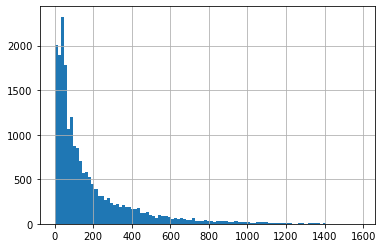

In [58]:
df['days_exposition'].hist(bins = 100)

По гистограмме видно, что довольно малая часть объявлений были размещены на сайте более 900 дней (почти три года). Пик значений приходится на 100 дней - около 3 месяцев.

### Расчёт и добавление к таблице новыых столбцов

Добавим столбец с ценой одного квадратного метра для каждой квартиры в таблице:

In [59]:
df['price_for_meter'] = df['last_price'] / df['total_area']

Столбец с днём публикации объявления, где понедельнику соответствует "0", а воскресенью - "6":

In [60]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Столбец с месяцем публикации объявления:

In [61]:
df['month'] = df['first_day_exposition'].dt.month

Столбец с годом публикации объявления:

In [62]:
df['year'] = df['first_day_exposition'].dt.year

Столбец со значением этажа, где первому этажу соответствует значение "Первый", последнему - "Последний", прочим - "Другой".
Для этого сначала определим функцию, которая будет возвращать соответствующие значения исходя из значений столбца floor:

In [63]:
def floor_type(x):
    if x['floor'] == 1:
        return 'Первый'
    elif x['floor'] == x['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [64]:
df['floor_type'] = df.apply(floor_type, axis = 1)

Столбец с расстоянием до центра города в километрах:

In [65]:
df['city_center_km'] = (df['city_centers_nearest'] / 1000).round()

### Исследовательский анализ данных

Напишем функцию, которая будет выводить на экран гистограмму при передаче ей следующих параметров:
- **column** - столбец таблицы с данными;
- **title** - название гистограммы;
- **xlabel** - подпись оси x;
- **ylabel** - подпись оси y;
- **nbins** - количество корзин.

In [66]:
def df_hist(column, title, xlabel, ylabel, nbins):
    f = column.hist(bins = nbins, figsize = (10, 5))
    f.axes.set_title(title)
    f.set_xlabel(xlabel)
    f.set_ylabel(ylabel)
    return f

Применим функцию для построения гистограммы по столбцу с общей площадью квартир:

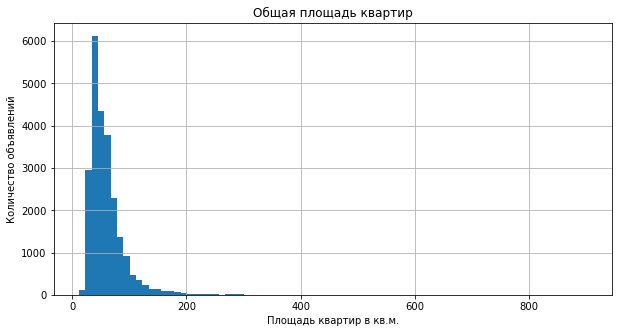

In [67]:
df_hist(df['total_area'], 'Общая площадь квартир', 'Площадь квартир в кв.м.', 'Количество объявлений', 80);

Гистограмма показывает, что бОльшая часть объявлений в выборке - о продаже квартир площадью около 50 кв.м. Квартир площадью больше 100 кв.м. - незначительное количество, и есть единичные объявления о продаже квартир площадью свыше 400 кв.м.

Построим гистограмму для столбца с данными о жилой площади:

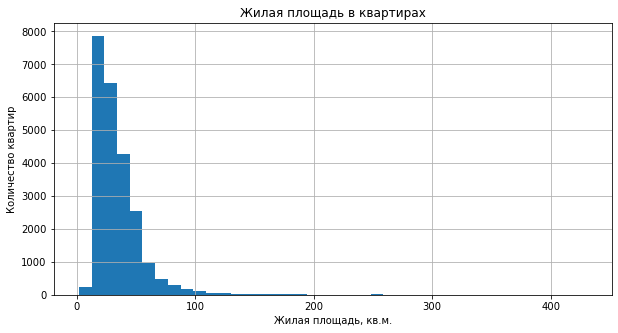

In [68]:
df_hist(df['living_area'], 'Жилая площадь в квартирах', 'Жилая площадь, кв.м.', 'Количество квартир', 40);

Наибольшее количество квартир в объявлениях - с жилой площадью от 20 до 50 кв.м. Квартир с жилой площадью больше 100 кв.м. в выборке незначительное количество, и совсем немного квартир с жилой площадью более 140 кв.м. В целом гистограмма соотносится с графиком общей площади квартир.

Выведем гистограмму для столбца с площадью кухни:

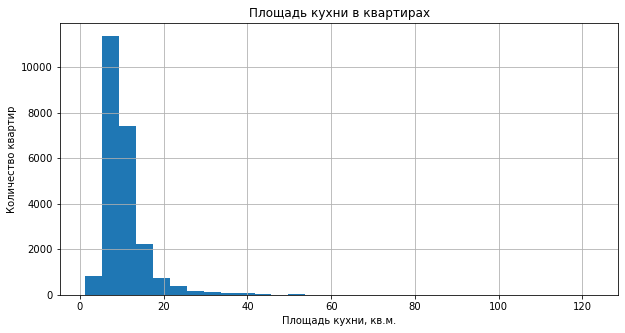

In [69]:
df_hist(df['kitchen_area'], 'Площадь кухни в квартирах', 'Площадь кухни, кв.м.', 'Количество квартир', 30);

По данным гистограммы в основной массе квартир площадь кухни от 5 до 10 кв.м., гораздо меньше квартир с кухнями площадью от 10 кв.м. и совсем немного - с площадью более 40 кв.м.
График также соотносится с двумя предыдущими.

Рассмотрим гистограмму по значениям столбца с ценами объектов:

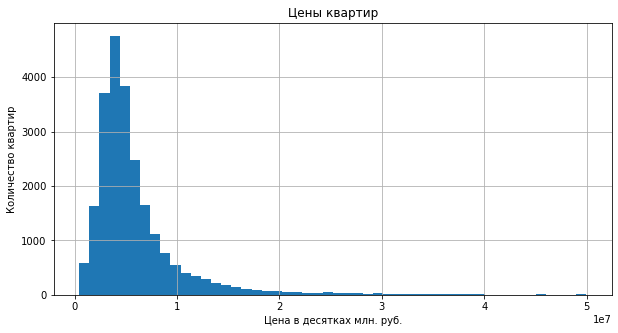

In [70]:
df_hist(df['last_price'].loc[df['last_price'] < 50000000], 'Цены квартир', 'Цена в десятках млн. руб.', 'Количество квартир', 50);

Большинство квартир имеют стоимость до 10 млн. руб.

Применим функцию для столбца с количеством комнат:

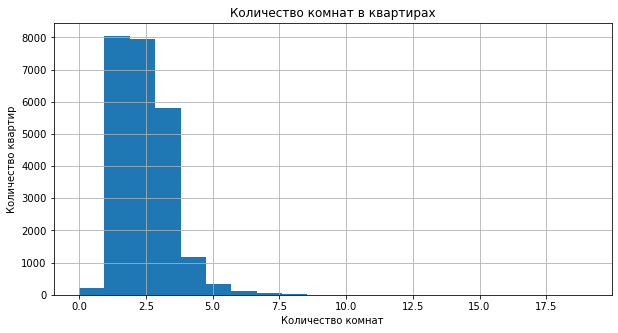

In [71]:
df_hist(df['rooms'], 'Количество комнат в квартирах', 'Количество комнат', 'Количество квартир', 20);

Наибольшее количество квартир в объявлениях - однокомнатные и двухкомнатные. Несколько меньше в выборке трёхкомнатных квартир. Доля квартир с количеством комнат 6 и более - крайне мала.

Построим гистограмму для столбца с высотой потолков:

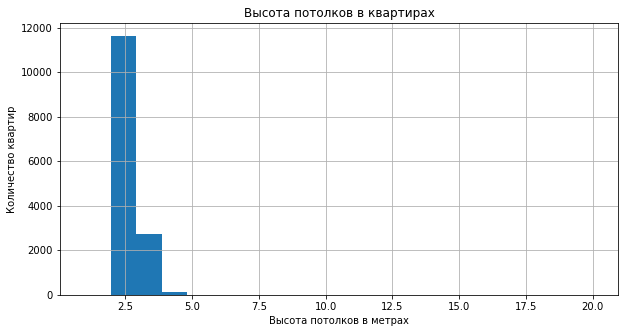

In [72]:
df_hist(df['ceiling_height'], 'Высота потолков в квартирах', 'Высота потолков в метрах', 'Количество квартир', 20);

В основном высота потолков в квартирах составляет от 2 до 3 м., однако в выборке есть квартиры и с более высокими потолками, хотя их доля незначительна.

Выведем на экран гистограмму для столбца со значениями этажа квартиры:

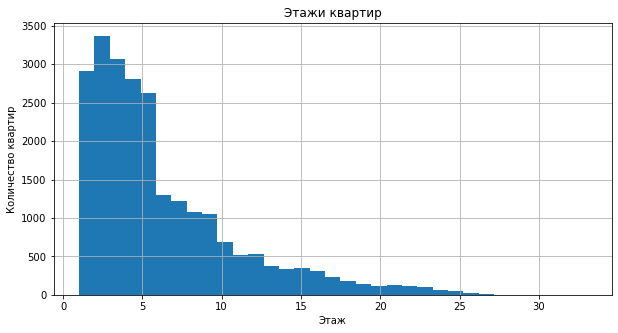

In [73]:
df_hist(df['floor'], 'Этажи квартир', 'Этаж', 'Количество квартир', 33);

Основная часть квартир располагается на первых пяти этажах, далее с увеличением этажа количество квартир снижается. На этажах выше 25-ого располагается очень небольшая доля квартир.

Также выведем гистограмму для типа этажа квартир:

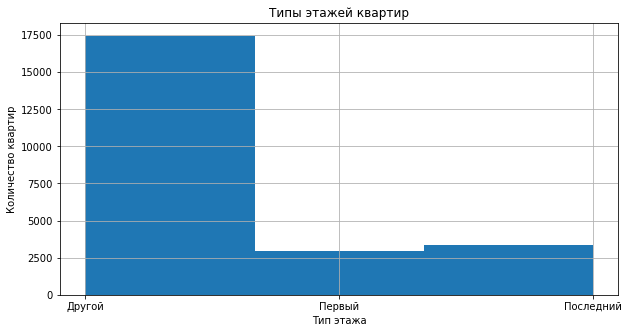

In [74]:
df_hist(df['floor_type'], 'Типы этажей квартир', 'Тип этажа', 'Количество квартир', 3);

В основном квартиры находятся на "средних" этажах - не первом и не последнем. На первом этаже меньше всего квартир - около 2000, на последнем - несколько больше, чем на первом.

Рассмотрим гистограмму для общего количества этажей в домах, где продаются квартиры:

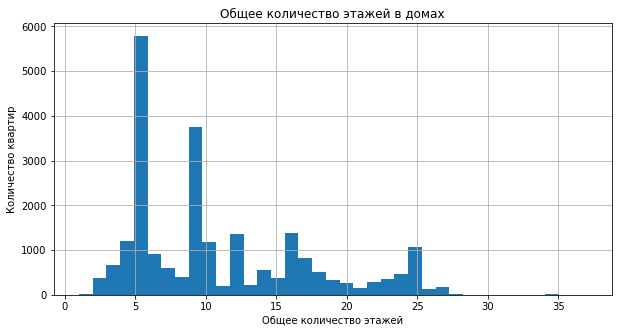

In [75]:
df_hist(df['floors_total'], 'Общее количество этажей в домах', 'Общее количество этажей', 'Количество квартир', 37);

Наибольшее количество продаваемых квартир находятся в пяти- и девятиэтажках. Меньше всего квартир продаётся в "высотках" от 26 этажей и выше, а также в малоэтажных домах (1-2 этажа).

Выведем на экран гистограмму значений столбца с расстоянием до центра города:

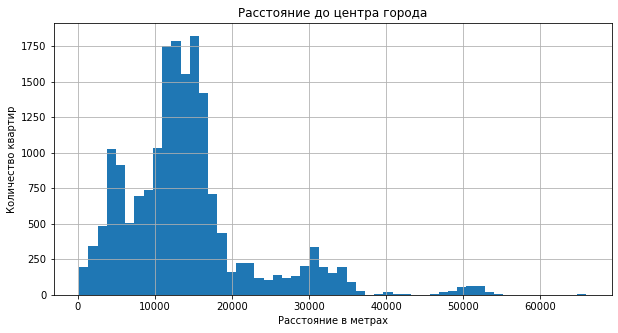

In [76]:
df_hist(df['city_centers_nearest'], 'Расстояние до центра города', 'Расстояние в метрах', 'Количество квартир', 55);

Наибольшее количество квартир располагается на удалении 11-15 км. от центра города, также есть пик на расстоянии 4-5 км. от города - скорее всего, это значения для более маленьких населённых пунктов. На удалении более 35 км. располагается малая доля квартир, однако на гистограмме виден небольшой выделющийся участок в районе 50 км.

Посмотрим на гистограмму, описывающую расстояние до ближайшего аэропорта:

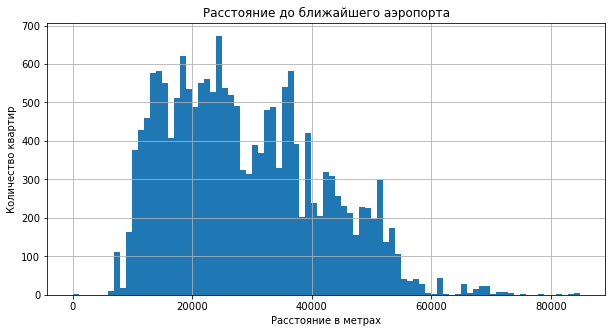

In [77]:
df_hist(df['airports_nearest'], 'Расстояние до ближайшего аэропорта', 'Расстояние в метрах', 'Количество квартир', 85);

В основном квартиры находятся на расстоянии от 13 до 40 км. от аэропорта, однако распределение в этом промежутке неравномерное. При этом небольшие доли квартир находятся на расстоянии до 10 км. и свыше 55 км.

Выведем гистограмму расстояний до ближайшего парка:

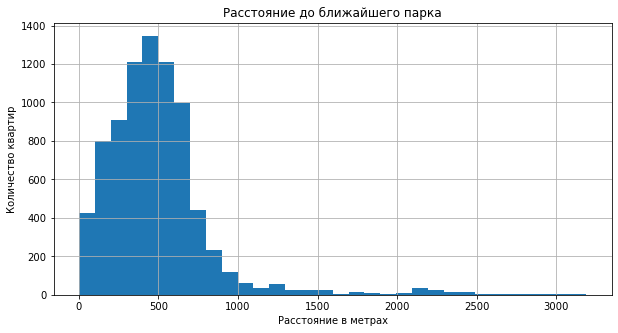

In [78]:
df_hist(df['parks_nearest'], 'Расстояние до ближайшего парка', 'Расстояние в метрах', 'Количество квартир', 32);

Для значительной доли квартир ближайший парк находится в пешей доступности - до 1 км., притом для большинства - около 400-600 м. Однако есть и квартиры, расстояние от которых до ближайшего парка - от 1 км. до 3.2 км., хотя доля таких квартир в общей выборке невелика.

Рассмотрим распределение публикаций объявлений по дням недели:

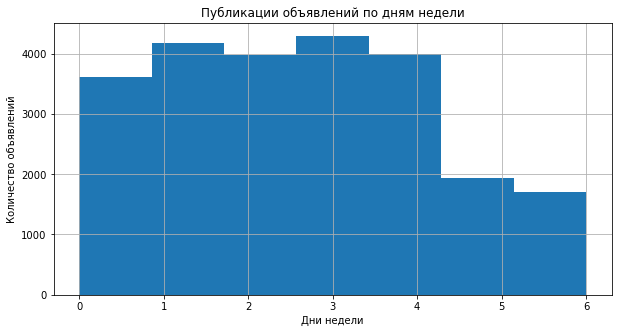

In [79]:
df_hist(df['weekday'], 'Публикации объявлений по дням недели', 'Дни недели', 'Количество объявлений', 7);

Соответствие дней недели числовым показателям на оси графика:
- 0 - понедельник;
- 1 - вторник;
- 2 - среда;
- 3 - четверг;
- 4 - пятница;
- 5 - суббота;
- 6 - воскресенье.

Исходя из графика видно, что по выходным дням объявления публикуются более, чем 2 в раза реже, чем по будним дням. На буднях же распределение по дням примерно равномерно за исключением понедельника - по понедельникам объявления публикуются немного реже.

Посмотрим распределение публикаций объявлений по месяцам:

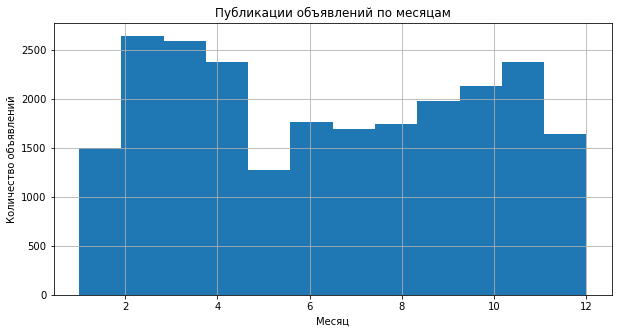

In [80]:
df_hist(df['month'], 'Публикации объявлений по месяцам', 'Месяц', 'Количество объявлений', 12);

В основном объявления публикуются в начале года, а именно с февраля по апрель. Далее мы видим резкий спад к маю, и затем - постепенное нарастание количества объявлений до ноября. В предновогодний и посленовогодний месяцы также публикуется меньше объявлений.

Изучим данные столбца, содержащего значения о количсетве дней размещения объявления. Построим гистограмму:

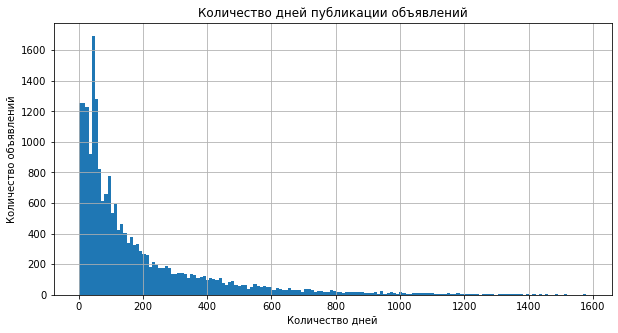

In [81]:
df_hist(df['days_exposition'], 'Количество дней публикации объявлений', 'Количество дней', 'Количество объявлений', 160);

При том, что в целом по гистограмме наблюдается довольно плавный спад количества объявлений с увеличением срока размещения, мы можем увидеть одну явно выделяющуюся пиковую точку в районе 50 дней.

Среднее значение и медиану проверим методом describe():

In [82]:
df['days_exposition'].describe()

count    20515.000000
mean       180.904411
std        219.738665
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средним значением для данных этого столбца является 181 день, а медианным - 95 дней. Учитывая такую большую разницу между средним и медианой можно сказать, что на среднее значение в данных сильно влияют выбросы - мы также видим большую разницу между значеним 75 процентиля и максимальным значением.

Таким образом, можно сказать, что обычно продажи занимают около 100 дней или 3 месяцев (пик на гистограмме и медианное значение столбца). Быстрые продажи занимают меньше месяца, а необычно долгие - более 730 дней (двух лет).

Проверим, зависит ли цена на квартиры от следующих факторов:
- общая площадь квартиры;
- жилая площадь квартиры;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира;
- дата размещения объявления.

# 1. Зависимость между ценой квартиры и её общей площадью:

Применим функцию pd.cut к столбцу с общей площадью, а результат запишем в новый столбец таблицы:

In [83]:
df['cut_total_area'] = pd.cut(df['total_area'], 6)

Выведем в виде сводной таблицы медианное значение для каждой из категорий квартир:

In [84]:
cut_total_area_pivot = df.pivot_table(index = 'cut_total_area', values = 'last_price', aggfunc = 'median').reset_index()
cut_total_area_pivot

,cut_total_area,last_price
0,"(11.112, 160.0]",4600000
1,"(160.0, 308.0]",25850000
2,"(308.0, 456.0]",43500000
3,"(456.0, 604.0]",74500000
4,"(604.0, 752.0]",140000000
5,"(752.0, 900.0]",420000000


Напишем функцию для построения графика по данным сводной таблицы, которая будет принимать следующие параметры:
- **xdata** - данные для оси x;
- **ydata** - данные для оси y;
- **title** - название графика;
- **xlabel** - подпись оси x;
- **ylabel** - подпись оси y.

In [85]:
def df_bar(xdata, ydata, title, xlabel, ylabel):
    f = seaborn.barplot(x = xdata, y = ydata)
    f.axes.set_title(title)
    f.set_xlabel(xlabel)
    f.set_ylabel(ylabel)
    return f

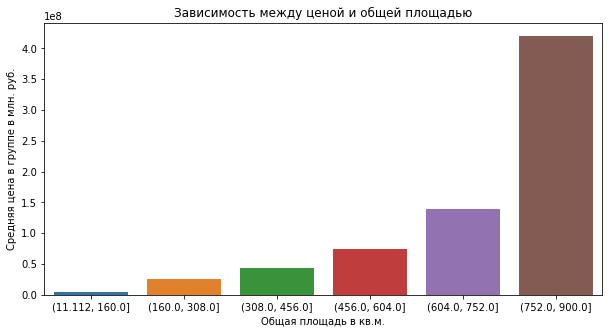

In [86]:
plt.figure(figsize=(10,5))
df_bar(cut_total_area_pivot['cut_total_area'], 
       cut_total_area_pivot['last_price'], 
       'Зависимость между ценой и общей площадью', 
       'Общая площадь в кв.м.', 
       'Средняя цена в группе в млн. руб.');

*Здесь и далее в графиках под средней ценой подразумевается медианное значение*

График отражает чёткую зависимость между площадью квартир и их стоимостью - чем больше общая площадь квартиры, тем выше её цена. Соответствие площади и категорий приведено выше.

Рассмотрим коэффициент корреляции между данными:

In [87]:
df['total_area'].corr(df['last_price'])

0.6537386648385535

Связь между данными общей площади и цены объекта довольно сильная.

# 2. Зависимость между ценой квартиры и её жилой площадью

Применим функцию pd.cut к столбцу с жилой площадью, а результат запишем в новый столбец таблицы:

In [88]:
df['cut_living_area'] = pd.cut(df['living_area'], 6)

Выведем в виде сводной таблицы медианное значение для каждой из категорий квартир:

In [89]:
cut_living_area_pivot = df.pivot_table(index = 'cut_living_area', values = 'last_price', aggfunc = 'median').reset_index()
cut_living_area_pivot

,cut_living_area,last_price
0,"(1.572, 73.356]",4500000
1,"(73.356, 144.711]",16800000
2,"(144.711, 216.067]",30750000
3,"(216.067, 287.423]",65000000
4,"(287.423, 358.778]",84000000
5,"(358.778, 430.134]",140000000


И выведем соответствующий график:

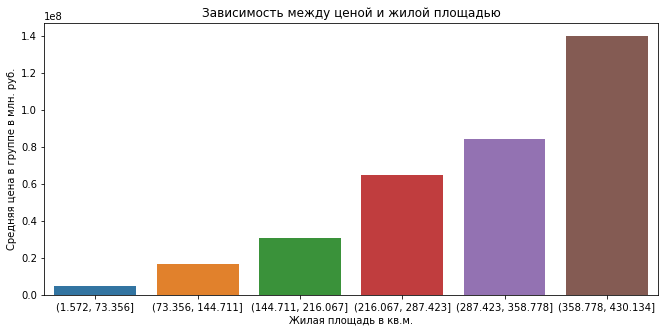

In [90]:
plt.figure(figsize=(11,5))
df_bar(cut_living_area_pivot['cut_living_area'], 
       cut_living_area_pivot['last_price'], 
       'Зависимость между ценой и жилой площадью', 
       'Жилая площадь в кв.м.', 
       'Средняя цена в группе в млн. руб.');

Ожидаемо, что и на этом графике мы видим точно такую же зависимость: чем больше жилая площадь квартиры, тем выше её цена.

Рассмотрим коэффициент корреляции между данными:

In [91]:
df['living_area'].corr(df['last_price'])

0.5861740009671592

Коэффициент показывает, что зависимость между жилой площадью и стоимостью квартиры есть, но меньший, чем между общей площадью и стоимостью.

# 3. Зависимость между ценой квартиры и площадью кухни


Применим функцию pd.cut к столбцу с площадью кухни, а результат запишем в новый столбец таблицы:

In [92]:
df['cut_kitchen_area'] = pd.cut(df['kitchen_area'], 6)

Выведем в виде сводной таблицы медианное значение для каждой из категорий квартир:

In [93]:
cut_kitchen_area_pivot = df.pivot_table(index = 'cut_kitchen_area', values = 'last_price', aggfunc = 'median').reset_index()
cut_kitchen_area_pivot

,cut_kitchen_area,last_price
0,"(1.179, 21.493]",4550000
1,"(21.493, 41.686]",14270000
2,"(41.686, 61.879]",23500000
3,"(61.879, 82.071]",55000000
4,"(82.071, 102.264]",65000000
5,"(102.264, 122.457]",85000000


И выведем соответствующий график:

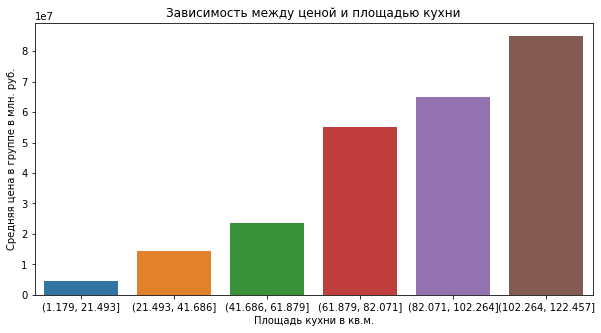

In [94]:
plt.figure(figsize=(10,5))
df_bar(cut_kitchen_area_pivot['cut_kitchen_area'], 
       cut_kitchen_area_pivot['last_price'], 
       'Зависимость между ценой и площадью кухни', 
       'Площадь кухни в кв.м.', 
       'Средняя цена в группе в млн. руб.');

На этом графике мы снова видим ту же зависимость: чем больше площадь кухни, тем выше стоимость квартиры.

Рассмотрим коэффициент корреляции между данными:

In [95]:
df['kitchen_area'].corr(df['last_price'])

0.483035896580159

Здесь коэффициент корреляции ещё ниже - связь данных о площади кухни и ценой квартиры ещё слабее.

# 4. Зависимость между ценой квартиры и количеством комнат

Выведем в виде сводной таблицы медианное значение для квартир с разным количеством комнат:

In [96]:
rooms_pivot = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
rooms_pivot

,last_price
rooms,
0,2700000
1,3600000
2,4772669
3,6200000
4,9000000
5,14000000
6,19000000
7,24900000
8,23095000


И выведем соответствующий график:

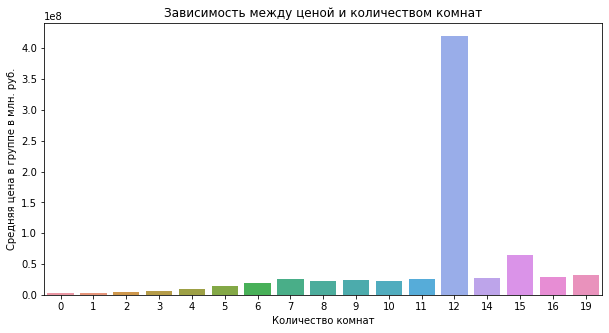

In [97]:
plt.figure(figsize=(10,5))
df_bar(df['rooms'].sort_values().unique(), 
       rooms_pivot['last_price'], 
       'Зависимость между ценой и количеством комнат', 
       'Количество комнат', 
       'Средняя цена в группе в млн. руб.');

На этом графике в целом видно плавное увеличение стоимости с увеличением комнат в квартире, за исключением двух пиковых значений: медианная цена для квартир с 12 комнатами значительно выше всех остальных, также 15-комнатные квартиры выбиваются из остальных значений, хотя и не так резко, как 12-комнатные.

Рассмотрим коэффициент корреляции между данными:

In [98]:
df['rooms'].corr(df['last_price'])

0.3633419206663899

Корреляция между количеством комнат и стоимостью квартир довольно низкая - это соотносится с данными графика, где мы видим резкие пиковые значения.

# 5. Зависимость между ценой квартиры и её этажом

Выведем в виде сводной таблицы медианное значение для квартир, располагающихся на разных этажах:

In [99]:
floor_pivot = df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
floor_pivot

,last_price
floor_type,
Другой,4850000
Первый,3900000
Последний,4300000


И выведем соответствующий график:

<AxesSubplot:title={'center':'Зависимость между ценой и этажом квартиры'}, xlabel='Этаж', ylabel='Средняя цена в группе в млн. руб.'>

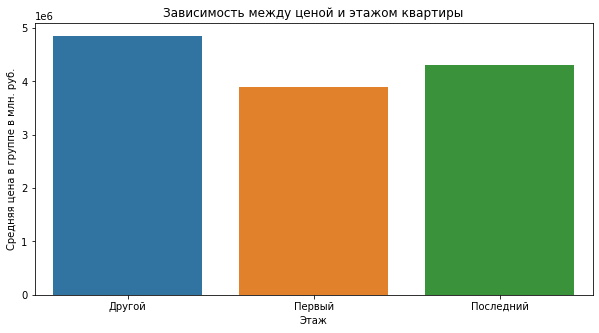

In [100]:
plt.figure(figsize=(10,5))
df_bar(df['floor_type'].sort_values().unique(), 
       floor_pivot['last_price'], 
       'Зависимость между ценой и этажом квартиры', 
       'Этаж', 
       'Средняя цена в группе в млн. руб.')

Исходя из этого графика мы видим, что квартиры на "других" этажах (не первых и не последних) обычно стоят меньше, чем на последних, а квартиры на первом этаже - самые дешёвые.

# 6. Зависимость между ценой квартиры и днём размещения объявления

Выведем в виде сводной таблицы медианное значение для квартир, объявления о продаже которых опубликованы в разные дни недели:

In [101]:
weekday_pivot = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median')
weekday_pivot

,last_price
weekday,
0,4650000
1,4730000
2,4700000
3,4650000
4,4585000
5,4555000
6,4550000


И выведем соответствующий график:

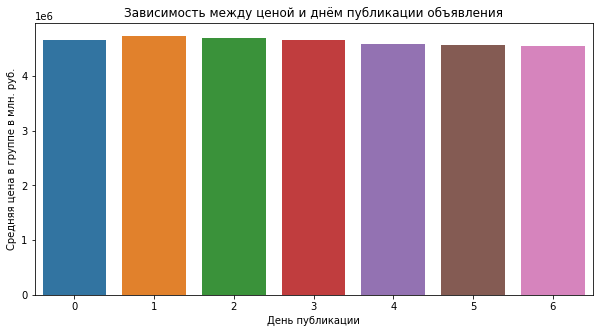

In [102]:
plt.figure(figsize=(10,5))
df_bar(df['weekday'].sort_values().unique(), 
       weekday_pivot['last_price'], 
       'Зависимость между ценой и днём публикации объявления', 
       'День публикации', 
       'Средняя цена в группе в млн. руб.');

День публикации объявления никак не влияет на стоимость квартиры, распределение по группам примерно одинаково.

Рассмотрим коэффициент корреляции между данными:

In [103]:
df['weekday'].corr(df['last_price'])

0.0015304649675100402

Корреляция в данном случае практически нулевая.

# 7. Зависимость между ценой квартиры и месяцем размещения объявления

Выведем в виде сводной таблицы медианное значение для квартир, объявления о продаже которых опубликованы в разные месяцы:

In [104]:
month_pivot = df.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
month_pivot

,last_price
month,
1,4600000
2,4650000
3,4650000
4,4800000
5,4515000
6,4400000
7,4650000
8,4570000
9,4700000


И выведем соответствующий график:

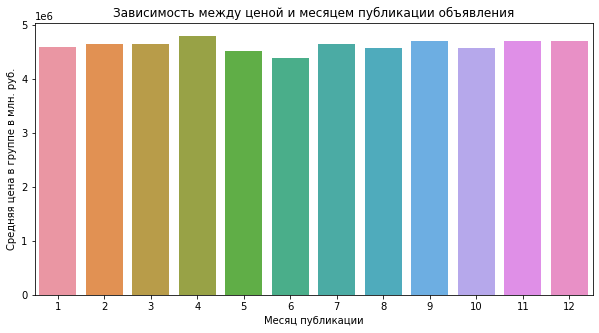

In [105]:
plt.figure(figsize=(10,5))
df_bar(df['month'].sort_values().unique(), 
       month_pivot['last_price'], 
       'Зависимость между ценой и месяцем публикации объявления', 
       'Месяц публикации', 
       'Средняя цена в группе в млн. руб.');

Из данных диаграммы видно, что объявления с самой низкой ценой обычно публикуются в июне, а с самой высокой - в апреле. Однако разница в стоимости в разрезе месяца публикации, тем не менее, небольшая.

Рассмотрим коэффициент корреляции между данными:

In [106]:
df['month'].corr(df['last_price'])

0.002760780715777249

Корреляция, как и в случае зависимости цены от дня недели, почти нулевая.

# 8. Зависимость между ценой квартиры и годом размещения объявления

Выведем в виде сводной таблицы медианное значение для квартир, объявления о продаже которых опубликованы в разные годы:

In [107]:
year_pivot = df.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
year_pivot

,last_price
year,
2014,7700000
2015,5350000
2016,4550000
2017,4500000
2018,4550000
2019,5050000


И выведем соответствующий график:

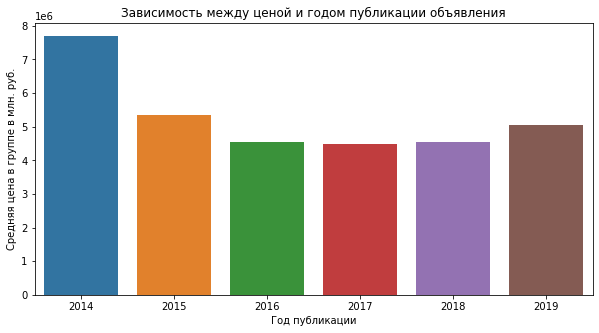

In [108]:
plt.figure(figsize=(10,5))
df_bar(df['year'].sort_values().unique(), 
       year_pivot['last_price'], 
       'Зависимость между ценой и годом публикации объявления', 
       'Год публикации', 
       'Средняя цена в группе в млн. руб.');

Диаграмма показывает, что стоимость квартир снижалась с 2014 по 2017 гг., а с 2017 по 2019 гг. - росла, причём в 2014г. значение было пиковым и достигло почти 8 млн. руб.

Рассмотрим коэффициент корреляции между данными:

In [109]:
df['year'].corr(df['last_price'])

-0.043040119950785445

В данном случае корреляция уже не нулевая, но тем не менее очень низкая. Можно сказать, что связи между данными года публикации и цены квартиры нет.

# 9. Расчёт цены одного квадратного метра 

Выведем сводную таблицу со средней ценой за один квадратный метр и количеством объявлений по городам:

In [110]:
meter = df.pivot_table(index = 'locality_name', values = 'price_for_meter', aggfunc = ['mean', 'count'])
meter

,mean,count
,price_for_meter,price_for_meter
locality_name,,
Unknown,92839.697026,52
Бокситогорск,17551.591819,16
Волосово,41224.950098,39
Волхов,36683.338668,116
Всеволожск,68928.628984,415
...,...,...
село Путилово,39921.758208,2
село Рождествено,51067.726833,4


Устраним мультииндексы в таблице:

In [111]:
meter.columns = ['_'.join(col).strip() for col in meter.columns.values]
meter

,mean_price_for_meter,count_price_for_meter
locality_name,,
Unknown,92839.697026,52
Бокситогорск,17551.591819,16
Волосово,41224.950098,39
Волхов,36683.338668,116
Всеволожск,68928.628984,415
...,...,...
село Путилово,39921.758208,2
село Рождествено,51067.726833,4
село Русско-Высоцкое,54833.726028,9


Отфильтруем данные таблицы по убыванию количества объявлений и выведем на экран первые 10 строк:

In [112]:
top10 = meter.sort_values(by = 'count_price_for_meter', ascending = False).head(10)
top10

,mean_price_for_meter,count_price_for_meter
locality_name,,
Санкт-Петербург,112653.522120,16587
посёлок Шушары,78441.622197,461
Всеволожск,68928.628984,415
Пушкин,100998.887638,391
Колпино,75282.421661,353
посёлок Парголово,89493.244688,338
Гатчина,69373.670920,323
деревня Кудрово,92159.512935,308
Выборг,58351.388516,246


Получившуюся таблицу отсортируем по убыванию значений столбца средней цены за квадратный метр:

In [113]:
top10.sort_values(by = 'mean_price_for_meter', ascending = False)

,mean_price_for_meter,count_price_for_meter
locality_name,,
Санкт-Петербург,112653.522120,16587
Пушкин,100998.887638,391
деревня Кудрово,92159.512935,308
посёлок Парголово,89493.244688,338
Петергоф,84515.792067,209
посёлок Шушары,78441.622197,461
Колпино,75282.421661,353
Гатчина,69373.670920,323
Всеволожск,68928.628984,415


Таким образом, самая высокая средняя цена за квадратный метр - в Санкт-Петербурге, она составляет 112653,52 руб. Самая низкая цена среди 10 городов с наибольшим количеством объявлений - в Выборге, это 58351,39 руб.

# 10. Расчёт средней цены одного километра 


Для расчёта средней цены одного километра в Санкт-Петербурге создадим переменную с данными таблицы, относящимися только к Санкт-Петербургу:

In [114]:
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']

Выведем на экран сводную таблицу со средней ценой квартир в разрезе удалённости от центра города:

In [115]:
km = df_spb.pivot_table(index = 'city_center_km', values = 'last_price').astype(int).reset_index()
km

,city_center_km,last_price
0,0.0,31449115
1,1.0,21206720
2,2.0,17788319
3,3.0,11126581
4,4.0,13304279
5,5.0,14499121
6,6.0,15338418
7,7.0,14775152
8,8.0,9957716
9,9.0,6962378


Проиллюстрируем полученные данные графиком:

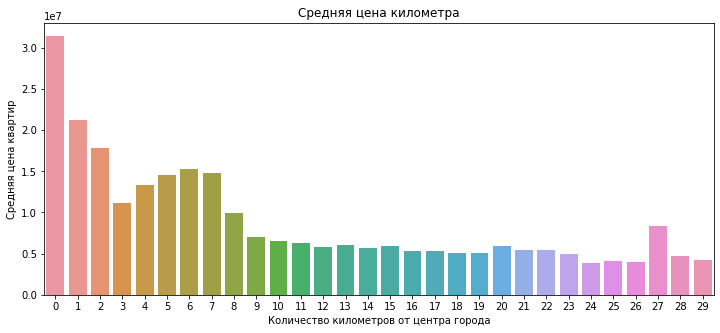

In [116]:
plt.figure(figsize=(12,5))
df_bar(km['city_center_km'].astype(int), 
       km['last_price'], 
       'Средняя цена километра', 
       'Количество километров от центра города', 
       'Средняя цена квартир');

Наиболее высокая цена квартир ожидаемо в непосредственной близости от центра города и снижается при удалении от центра, однако снижается неравномерно - например, на расстоянии 4-7 км. цены на квартире выше, чем в 3 км. от центра города. Также на расстоянии 27 км. от центра цена квартир выше, чем в "соседних районах" (например, на расстоянии в 26 и 28 км.). Вероятно, это связано с тем, что на этих расстояниях находятся наиболее благоприятные, благоустроенные или элитные районы.

### Общий вывод

В результате анализа данных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах была проверена зависимость цен на квартиры от различных факторов.

Наиболее влияющие на цену факторы - это:
1. Площадь квартиры (общая, жилая, площадь кухни) - чем больше эти показатели, тем выше цена квартиры;
2. Количество комнат - чем больше комнат в квартире, тем больше её стоимость. Однако есть и квартиры, медианное значение стоимости которых выбивается из других значений (12-комнатные и 15-комнатные). Это может быть связано с влиянием других факторов;
3. Этаж, на котором располагается квартира - квартиры на первом этаже имеют самую низкую стоимоть, также квартиры на последних этажах дешевле, чем остальные;
4. Год публикации объявления - в 2014г. цены на квартиры были наиболее высокими, далее наблюдается снижение цен к 2017г. и снова повышение к 2019г.;
5. Месяц публикации объявления - влияет меньше, на графике разброс значений невелик. Тем не менее, цена квартир обычно самая высокая в апреле, а самая низкая - в июне.
День публикации объявления на стоимость квартиры не влияет.

Была рассмотрена средняя стоимость квадратного метра в 10 городах с наибольшим количеством объявлений. Среди таких городов самая высокая цена - в Санкт-Петербурге (112653,52 руб.), а самая низкая - в Выборге (58351,39 руб.).

На стоимость квартир в Санкт-Петербурге также влияет удалённость квартиры от центра города - как правило, чем дальше квартира от центра, тем ниже её стоимость. Однако на графике мы увидели "всплеск" на расстоянии 4-7 км. и 27 км. Вероятно, это связано с тем, что на этих расстояниях находятся наиболее благоприятные, благоустроенные или элитные районы.